In [1]:
import numpy as np
import matplotlib.pyplot as plt

Backpropagation simple single node with linear one variable function.

1 of 20 epochs
e = f(x) - y = f(0) - 0.8 = 0 - 0.8 = -0.30000000000000004
dy/dx = 0.24999791668749438
dx = - learning_rate * e / dydx = - 0.2 * -0.30000000000000004 / 0.24999791668749438 = 0.2400019999966719
x = x + dx = 0.0 + 0.2400019999966719 = 0.2400019999966719
2 of 20 epochs
e = f(x) - y = f(0.2400019999966719) - 0.8 = 0.2400019999966719 - 0.8 = -0.2402858578651259
dy/dx = 0.24643225550194936
dx = - learning_rate * e / dydx = - 0.2 * -0.2402858578651259 / 0.24643225550194936 = 0.1950116938837377
x = x + dx = 0.2400019999966719 + 0.1950116938837377 = 0.4350136938804096
3 of 20 epochs
e = f(x) - y = f(0.4350136938804096) - 0.8 = 0.4350136938804096 - 0.8 = -0.1929297454405895
dy/dx = 0.23853424626082975
dx = - learning_rate * e / dydx = - 0.2 * -0.1929297454405895 / 0.23853424626082975 = 0.16176272251459178
x = x + dx = 0.43501369388040956 + 0.16176272251459178 = 0.5967764163950013
4 of 20 epochs
e = f(x) - y = f(0.5967764163950013) - 0.8 = 0.5967764163950013 - 0.8 = -0.155081544708

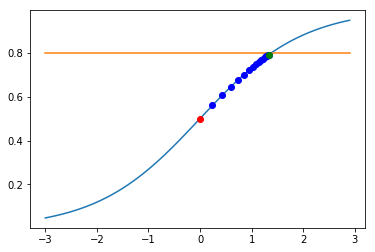

In [196]:
def findX(y, learning_rate = 0.01, max_epochs = 1000, x = np.random.randn(), debug = False, epsilon = 0.001):   
    f = lambda x : 1/(1 + np.exp(-x))
    
    X = np.arange(-3,3, 0.1)

    plt.plot(X, f(X))
    plt.plot(X, np.ones((X.shape[0]))*y)
    plt.plot(x, f(x), 'ro')

      

    for i in range(max_epochs):
        print("{} of {} epochs".format(i+1, max_epochs))
        e = f(x) - y
        print("e = f(x) - y = f({}) - {} = {} - {} = {}".format(x, y, x, y, e))
        if (abs(e) < epsilon):
            print(e)
            break

        dydx = (f(x+epsilon) - f(x-epsilon)) / (2 * epsilon)  
        print("dy/dx =", dydx)
        dx = - learning_rate * e / dydx
        print("dx = - learning_rate * e / dydx = - {} * {} / {} = {}".format(learning_rate, e, dydx, dx))
        x += dx
        print("x = x + dx = {} + {} = {}".format(x-dx, dx, x))
        #print(e, dydx, dx, y, x)
        if i % 1 == 0:
            #if (debug):
                #print("e:", e, "dx:", dx, "x:", x, "f(x):", f(x))
            plt.plot(x, f(x), 'bo')

    #print(i+1, max_epochs)
    if (i+1 < max_epochs):
        print("found")
        plt.plot(x, f(x), 'go')
    else:
        print("fail")
        plt.plot(x, f(x), 'bo')
    plt.show()

    
findX(0.8, learning_rate = 0.2, max_epochs = 20, x = 0, debug = True, epsilon = 0.01)

Artificial Neural Networks often use a sigmoid function as an activation function. The formula and appearance looks like this:

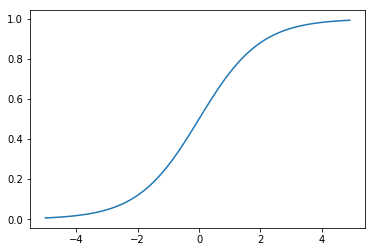

In [201]:
sigmoid = lambda x : 1 / (1 + np.exp(-x))

X = np.arange(-5,5,0.1)
plt.plot(X, sigmoid(X))
plt.show()

Two handy thing with the sigmoid function is that the values are between 0 and 1 (exclusive) and it is easy to calculate the derivative, it can even be done given the output value.

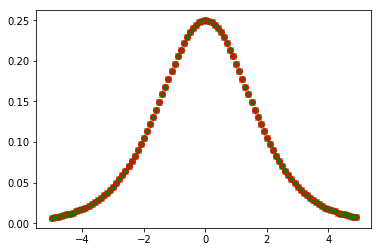

In [214]:
sigmoid = lambda x : 1 / (1 + np.exp(-x))
sigmoid_derivative_y = lambda y: y * (1 - y)
sigmoid_derivative_x = lambda x: sigmoid(x) * (1 - sigmoid(x))

plt.plot(X, sigmoid_derivative_y(sigmoid(X)), 'ro')
plt.plot(X, sigmoid_derivative_x(X), 'gx')
plt.show()

This means that if we have the input to the sigmoid function we can get the output and also the derivate at that point, but also that if we know the output (actual, or wanted), then we can calculate the the derivate without knowing the matching input. This will proof useful as we will see shortly.

Lets say we have a neuron with the activation function `f`, where `f` is the `sigmoid` function. `f(z) = 1 / (1 + np.exp(-z))`. We will soon see why I call it z.

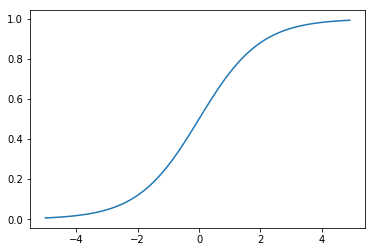

In [216]:
sigmoid = lambda z : 1 / (1 + np.exp(-z))
plt.plot(X, sigmoid(X))
plt.show()

So the sigmoid shown above is the activation function of a neuron. If we want to train a network with multiple neuron we need to be able to figure given a specific expected output of a neuron activation function, what input would be suitable.  

y = 0.9686486493460097
z = -1.1639411935414814
y is the expected output (because of reasons), and z is the input
yhat = f(z) = 0.23795188750749405
yhat is the actual output given the current input
e = -0.7306967618385156
e is the current error, based on actual and expected output
dy/dz = 0.18133078673911493
We know the derivative, lets use that together with the error to decide how we want the input to change
dx = - learning_rate * e / dydx = - 0.5 * -0.7306967618385156 / 0.18133078673911493 = 2.014817160887817
z = 0.8508759673463357
yhat = 0.7007508643257437
We update z, calulate new yhat and mark the position in the graph


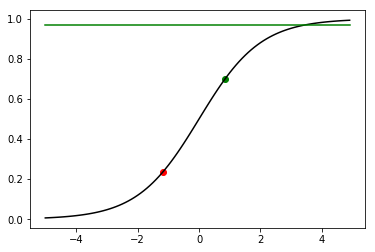

In [256]:
y = np.random.rand()
print("y =", y)

z = np.random.randn()
print("z =", z)
print("y is the expected output (because of reasons), and z is the input")

f = sigmoid
yhat = f(z)
print("yhat = f(z) =", yhat)
print("yhat is the actual output given the current input")
plt.plot(z, yhat, 'ro')

e = yhat - y
print("e =", e)
print("e is the current error, based on actual and expected output")

fprim = lambda y : y * (1 - y)  # The derivative, calculated using the output instead of input
dydz = fprim(yhat)
print("dy/dz =", dydz)
print("We know the derivative, lets use that together with the error to decide how we want the input to change")

learning_rate = 0.5
dz = - learning_rate * e / dydz
print("dx = - learning_rate * e / dydx = - {} * {} / {} = {}".format(learning_rate, e, dydz, dz))

z += dz
print("z =", z)
yhat = f(z)
print("yhat =", yhat)
print("We update z, calulate new yhat and mark the position in the graph")
plt.plot(z, yhat, 'go')


plt.plot(X, f(X), 'black')
plt.plot(X, np.ones((X.shape[0]))*y, 'g')
plt.show()

The green line above is the target, the red dot is the starting point, and the green that where we are after first round of compensations. If you run the cell multiple times, you can see that often we get closer to the line, but sometimes we overcompensates, but almost never do we hit the line in our first and only attempt. We will fix that be running multiple steps in a loop.

e = 0.12498086698480881
e = 0.06540704618440435
e = 0.03385098002515774
e = 0.017298636200389655
e = 0.008757600002286675


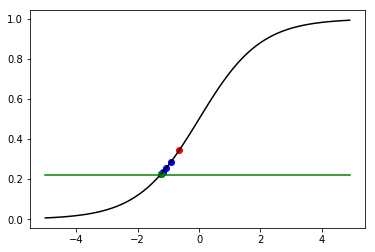

In [308]:
learning_rate = 0.5
y, z = np.random.rand(), np.random.randn() * 2
f = sigmoid
fprim = lambda y : y * (1 - y)
yhat = f(z)
plt.plot(z, yhat, 'ro')

for _ in range(5):
    e = yhat - y
    print("e =", e)
    dydz = fprim(yhat)
    dz = - learning_rate * e / dydz
    z += dz
    yhat = f(z)
    plt.plot(z, yhat, 'bo')

    
plt.plot(z, yhat, 'go')   
plt.plot(X, f(X), 'black')
plt.plot(X, np.ones((X.shape[0]))*y, 'g')
plt.show()

The red dot is the starting point, the black the intermediate steps, and the green is where we ended up after the last step we took when improving. It would be good if we could just stop when we where close enough. So either iterate until we reach max iterations, or until we are close enough. Note also that we have a learning rate that decides how big part of our approximate best step we should try to take.

Good enough after 99 epochs!
e = 0.0009691349376882985


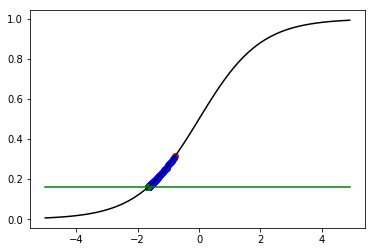

In [335]:
learning_rate, sigma, max_epochs = 0.05, 0.001, 1000
y, z = np.random.rand(), np.random.randn() * 2
f, fprim = sigmoid, lambda y : y * (1 - y)

yhat = f(z)
plt.plot(z, yhat, 'ro')

for epoch in range(max_epochs):
    e = yhat - y
    #print("e =", e)
    if (abs(e) < sigma):
        print("Good enough after {} epochs!".format(epoch))
        break
    dydz = fprim(yhat)
    dz = - learning_rate * e / dydz
    z += dz
    yhat = f(z)
    plt.plot(z, yhat, 'bo')

print("e =", e)   
plt.plot(z, yhat, 'go')   
plt.plot(X, f(X), 'black')
plt.plot(X, np.ones((X.shape[0]))*y, 'g')
plt.show()

So, if we know what output we want from the activation function we can use gradient descent (what we have done above), to try to find the suitable input. However, in a artificial neuron we cannot directly control the input to the activation function. The input `z` is a combination of multiple weighted inputs, and possible a separate bias. We can try to figure out how to adjust the weights and bias, and if the inputs is from another neuron (and not the input layer), we can suggest how we would like the output from other neurons should change, but lets pretend there is only the one neuron, which only have the one input, and lets skip that bias initially.

First off, lets randomize the expected output `y`, the given input `x` and the weight `w`. We cannot change `y` and `x`, but we are supposed to find the suitable `w`. 

Good enough after 81 epochs!
e = 0.00994250583054971
w = -9.615801178477271


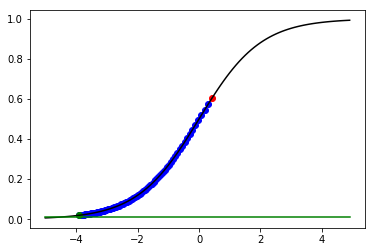

In [340]:
learning_rate, sigma, max_epochs = 0.05, 0.01, 1000
y, x, w = np.random.rand(), np.random.rand(), np.random.randn()
f, fprim = sigmoid, lambda y : y * (1 - y)

z = w * x
yhat = f(z)
plt.plot(z, yhat, 'ro')

for epoch in range(max_epochs):
    e = yhat - y
    #print("e =", e)
    if (abs(e) < sigma):
        print("Good enough after {} epochs!".format(epoch))
        break
    dydz = fprim(yhat)
    dz = - learning_rate * e / dydz    
    dw = dz / x
    w += dw
    #print("dw =", dw, "w", w) 
    # ---- 
    z = w * x
    yhat = f(z)
    #z += dz
    #yhat = f(z)
    plt.plot(z, yhat, 'bo')

print("e =", e) 
print("w =", w) 


plt.plot(z, yhat, 'go')   
plt.plot(X, f(X), 'black')
plt.plot(X, np.ones((X.shape[0]))*y, 'g')
plt.show()

Lets instead say we have two weighted inputs and one expected output, how would that be?

Good enough after 24 epochs!
e = -0.009474220926218857
w = [5.67991209 1.33678233]


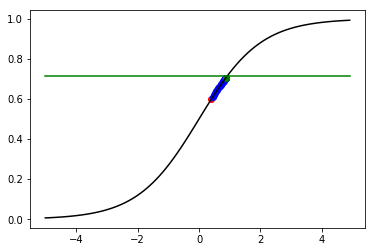

In [367]:
learning_rate, sigma, max_epochs = 0.05, 0.0001, 1000
y, x, w = np.random.rand(), np.random.rand(2), np.random.randn(2)
f, fprim = sigmoid, lambda y : y * (1 - y)

z = w.dot(x)
yhat = f(z)
plt.plot(z, yhat, 'ro')

for epoch in range(max_epochs):
    e = yhat - y
    #print("e =", e, "sum(e ** 2) = ", np.sum(e ** 2))
    if (abs(np.sum(e ** 2)) < sigma):
        print("Good enough after {} epochs!".format(epoch))
        break
    dydz = fprim(yhat)
    dz = - learning_rate * e / dydz    
    dw = dz / x  # <---- why, and what does it really mean?
    w += dw
    #print("dw =", dw, "w", w) 
    # ---- 
    z = w.dot(x)
    yhat = f(z)
    #print("z = ", z, "yhat = ", yhat)
    #z += dz
    #yhat = f(z)
    plt.plot(z, yhat, 'bo')

print("e =", e) 
print("w =", w) 


plt.plot(z, yhat, 'go')   
plt.plot(X, f(X), 'black')
plt.plot(X, np.ones((X.shape[0]))*y, 'g')
plt.show()

Lets now assume that we actually have two examples in our training data that we need to match, can we manage that?

e = [[-0.13068784  0.01024016]] sum(e ** 2) =  0.017184171700592592
dw = [[-0.0445929  -0.05572265]]
e = [[-0.12710829  0.01328963]] sum(e ** 2) =  0.016333131372289672
dw = [[-0.04196865 -0.05340644]]
e = [[-0.12371207  0.0161811 ]] sum(e ** 2) =  0.015566504458905334
dw = [[-0.03947958 -0.05120929]]
e = [[-0.12049005  0.01892204]] sum(e ** 2) =  0.014875896366178587
dw = [[-0.03711911 -0.04912537]]
e = [[-0.11743348  0.02151965]] sum(e ** 2) =  0.014253716524731657
dw = [[-0.03488093 -0.04714906]]
e = [[-0.11453395  0.02398086]] sum(e ** 2) =  0.013693107966964732
dw = [[-0.03275899 -0.04527499]]
e = [[-0.11178346  0.02631234]] sum(e ** 2) =  0.013187881657475834
dw = [[-0.03074748 -0.04349801]]
e = [[-0.10917435  0.02852047]] sum(e ** 2) =  0.012732455579158634
dw = [[-0.02884083 -0.0418132 ]]
e = [[-0.10669931  0.03061136]] sum(e ** 2) =  0.012321798483737354
dw = [[-0.02703376 -0.04021587]]
e = [[-0.10435139  0.03259087]] sum(e ** 2) =  0.011951378148413391
dw = [[-0.02532117 -0.0

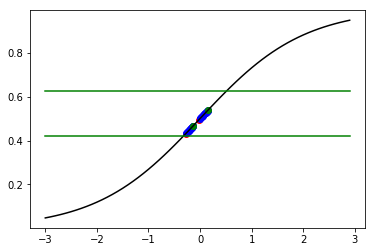

In [404]:
learning_rate, sigma, max_epochs = 0.1, 0.01, 1000
mm=2
y, x, w, b = np.random.rand(1,mm), np.random.rand(2,mm), np.random.randn(1,2), np.random.randn(1,1)
f, fprim = sigmoid, lambda y : y * (1 - y)


m = x.shape[1]

z = w.dot(x) + b
yhat = f(z)
plt.plot(z, yhat, 'ro')

for epoch in range(max_epochs):
    e = yhat - y
    print("e =", e, "sum(e ** 2) = ", np.sum(e ** 2))
    if (abs(np.sum(e ** 2)) < sigma):
        print("Good enough after {} epochs!".format(epoch))
        break
#    dydz = fprim(yhat)
#    dz = - learning_rate * e / dydz
    #print("dydz = ", dydz, "dz =", dz )
#    dz = np.average(dz)
    #print("dz = avg(dz) =", dz)
    # dw = dz / x  # <---- why, and what does it really mean? we need to split the wanted change in z over the inputs considering w
    A = yhat.T.T
    Y = y.T.T
    X = x.T.T
   
    #dw = 1 / m * np.dot(X, (A-Y).T).T  # from https://hub.coursera-notebooks.org/user/yadwmbgxpaqkrcmnopvewd/notebooks/Week%202/Logistic%20Regression%20as%20a%20Neural%20Network/Logistic%20Regression%20with%20a%20Neural%20Network%20mindset%20v5.ipynb
    dw = 1 / m * np.dot((A-Y), X.T)
    print("dw =", dw)
    
    db = 1 / m * np.sum(A - Y)    
    
    w -= learning_rate * dw
    b -= learning_rate * db
    #print("dw =", dw, "w", w) 
    # ---- 
    z = w.dot(x) + b
    yhat = f(z)
    plt.plot(z, yhat, 'bo')

print(X.shape, Y.shape)
print("e =", e) 
print("w =", w) 

print(z, yhat)
plt.plot(z, yhat, 'go')  
X = np.arange(-3, 3, 0.1)
plt.plot(X, f(X), 'black')
for i in y.flatten():
    plt.plot(X, np.ones((X.shape[0]))*i, 'g')
plt.show()

So, to summarize, lets have a concrete example, we want to train a neuron to implement this truth table:

 x1 | x2 | y 
----|----|----
  0 |  0 |  0
  0 |  1 |  0
  1 |  0 |  0
  1 |  1 |  1
  
  

In [515]:
truth_table = np.array([[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 1]])
print(" x1,x2,y")
print(truth_table)

 x1,x2,y
[[0 0 0]
 [0 1 0]
 [1 0 0]
 [1 1 1]]


We have one neuron with 2 inputs and 1 output, which means we need 2 weights and 1 bias, lets randomize them and see what output we get for our training data.

In [521]:
W = np.random.randn(1,2)
B = np.random.randn(1,1)
print("W =", W, "B =", B)

W = [[ 0.22739612 -1.1559714 ]] B = [[-0.82235222]]


In [522]:
print("W =", W, "B =", B)
X = truth_table[:, 0:2].T
Y = truth_table[:, 2:3].T
print("X =\n" + str(X), "\nY =\n" + str(Y))
A = sigmoid(W.dot(X) + B)
print("A:\n" + str(A))
print("error:\n" + str(A - Y))

W = [[ 0.22739612 -1.1559714 ]] B = [[-0.82235222]]
X =
[[0 0 1 1]
 [0 1 0 1]] 
Y =
[[0 0 0 1]]
A:
[[0.30526458 0.12149765 0.3554985  0.14793025]]
error:
[[ 0.30526458  0.12149765  0.3554985  -0.85206975]]


Lets calculate the gradients on w and b and try to update the weights and bias based on that.

In [524]:
debug = True


for i in range(100):    
    dw = (1 / m * np.dot(X, (A-Y).T)).T
    db = 1 / m * np.sum(A - Y)      
    learning_rate = 0.05
    W -= learning_rate * dw
    B -= learning_rate * db    
    A = sigmoid(W.dot(X) + B)
    if i % 20 == 0 and debug:
        print("dw:", dw, " db:", db)
        print("W:", W, "B:", B)
        print("A:" + str(A))
        print("error:" + str(A - Y))

print("W:", W, "B:", B)
print("A:" + str(A))
print("error:" + str(A - Y))
print("Pretending above 0.5 means 1: ", (A > 0.5) * 1)

dw: [[-0.08352613 -0.1720251 ]]  db: 0.13878517663055484
W: [[0.9194892 0.0911577]] B: [[-1.30093824]]
A:[[0.21400716 0.22973988 0.40577745 0.42793254]]
error:[[ 0.21400716  0.22973988  0.40577745 -0.57206746]]
dw: [[-0.07725353 -0.15649385]]  db: 0.1362450316808959
W: [[0.99950651 0.25475044]] B: [[-1.43860684]]
A:[[0.19176118 0.23435951 0.39195536 0.45404261]]
error:[[ 0.19176118  0.23435951  0.39195536 -0.54595739]]
dw: [[-0.07294755 -0.14373844]]  db: 0.13196474795124002
W: [[1.07438001 0.40435815]] B: [[-1.57268945]]
A:[[0.17183333 0.23715674 0.37793804 0.47652944]]
error:[[ 0.17183333  0.23715674  0.37793804 -0.52347056]]
dw: [[-0.06974684 -0.13293109]]  db: 0.1270857287673226
W: [[1.14557853 0.54228482]] B: [[-1.70211388]]
A:[[0.15418938 0.23869835 0.36434949 0.49643743]]
error:[[ 0.15418938  0.23869835  0.36434949 -0.50356257]]
dw: [[-0.06719677 -0.12358234]]  db: 0.1221454959600331
W: [[1.21394486 0.67020129]] B: [[-1.82659812]]
A:[[0.13864403 0.23932262 0.35145419 0.51438304]

Lets put that all together in a compact way:

In [525]:
learning_rate = 0.05
truth_table = np.array([[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 1]])
X = truth_table[:, 0:2].T
Y = truth_table[:, 2:3].T
W = np.random.randn(1,2)
B = np.random.randn(1,1)

A = sigmoid(W.dot(X) + B)
dw = (1 / m * np.dot(X, (A-Y).T)).T
db = 1 / m * np.sum(A - Y) 
W -= learning_rate * dw
B -= learning_rate * db  

print("What next? Borrow?")

In [526]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1 / (1 + np.exp(-z))
    ### END CODE HERE ###
    
    return s

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros((dim, 1))
    b = 0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    A = sigmoid(np.dot(w.T, X) + b)             # compute activation
    cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))   # compute cost
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = 1 / m * np.dot(X, (A-Y).T)
    db = 1 / m * np.sum(A - Y)
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w -= learning_rate * dw
        b -= learning_rate * db
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T, X) + b)
    ### END CODE HERE ###
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        Y_prediction[0,i] = 1 if A[0,i] > 0.5 else 0
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = np.zeros((X_train.shape[0], 1)), 0

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [536]:
X_train, Y_train, X_test, Y_test = X, Y, X, Y
model(X_train, Y_train, X_test, Y_test, num_iterations = 500, learning_rate = 0.05, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.539780
Cost after iteration 200: 0.462520
Cost after iteration 300: 0.406305
Cost after iteration 400: 0.363389
train accuracy: 100.0 %
test accuracy: 100.0 %


{'Y_prediction_test': array([[0., 0., 0., 1.]]),
 'Y_prediction_train': array([[0., 0., 0., 1.]]),
 'b': -2.202319937726839,
 'costs': [0.6931471805599453,
  0.5397804074873688,
  0.4625195582913762,
  0.4063051336837683,
  0.36338883785651616],
 'learning_rate': 0.05,
 'num_iterations': 500,
 'w': array([[1.23314027],
        [1.23314027]])}

In [537]:
X


array([[0, 0, 1, 1],
       [0, 1, 0, 1]])